## Tic-Tac-Toe Endgame Data Set 

Binary classification task on possible configurations of tic-tac-toe game

dataset from: https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame

In [17]:
#import numpy pandas and seaborn
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')

In [18]:
#read the data using read_csv
df = pd.read_csv('./tic-tac-toe.data', header=None)
df.columns = ['top_left_sqr', 'top_middle_sqr', 'top_right_sqr',
             'mid_left_sqr', 'mid_mid_sqr', 'mid_right_sqr', 
             'btm_left_sqr', 'btm_mid_sqr', 'btm_right_sqr',
             'class']

In [19]:
#using head() we will know about the first 5 columns of the data
df.head()

top_left_sqr top_middle_sqr top_right_sqr mid_left_sqr mid_mid_sqr  \
0            x              x             x            x           o   
1            x              x             x            x           o   
2            x              x             x            x           o   
3            x              x             x            x           o   
4            x              x             x            x           o   

  mid_right_sqr btm_left_sqr btm_mid_sqr btm_right_sqr     class  
0             o            x           o             o  positive  
1             o            o           x             o  positive  
2             o            o           o             x  positive  
3             o            o           b             b  positive  
4             o            b           o             b  positive

In [20]:
#using describe() we will undersatbd the count,unique,top and frequency of the attributes,.
df.describe()

top_left_sqr top_middle_sqr top_right_sqr mid_left_sqr mid_mid_sqr  \
count           958            958           958          958         958   
unique            3              3             3            3           3   
top               x              x             x            x           x   
freq            418            378           418          378         458   

       mid_right_sqr btm_left_sqr btm_mid_sqr btm_right_sqr     class  
count            958          958         958           958       958  
unique             3            3           3             3         2  
top                x            x           x             x  positive  
freq             378          418         378           418       626

In [21]:
#find whether there are any null values are not
df.isnull().sum()

top_left_sqr      0
top_middle_sqr    0
top_right_sqr     0
mid_left_sqr      0
mid_mid_sqr       0
mid_right_sqr     0
btm_left_sqr      0
btm_mid_sqr       0
btm_right_sqr     0
class             0
dtype: int64

In [22]:
#using value_counts() we will know about the dstribution of class labels
df['class'].value_counts()

positive    626
negative    332
Name: class, dtype: int64

In [23]:
#create dummies inorder to remove the categorical data
dummy_X = pd.get_dummies(df.iloc[:, :-1], drop_first=True) # 

In [24]:
#know the info about the dummies 
dummy_X.head()

top_left_sqr_o  top_left_sqr_x  top_middle_sqr_o  top_middle_sqr_x  \
0               0               1                 0                 1   
1               0               1                 0                 1   
2               0               1                 0                 1   
3               0               1                 0                 1   
4               0               1                 0                 1   

   top_right_sqr_o  top_right_sqr_x  mid_left_sqr_o  mid_left_sqr_x  \
0                0                1               0               1   
1                0                1               0               1   
2                0                1               0               1   
3                0                1               0               1   
4                0                1               0               1   

   mid_mid_sqr_o  mid_mid_sqr_x  mid_right_sqr_o  mid_right_sqr_x  \
0              1              0                1                0   
1              1              0                1                0   
2              1              0                1                0   
3              1              0                1                0   
4              1              0                1                0   

   btm_left_sqr_o  btm_left_sqr_x  btm_mid_sqr_o  btm_mid_sqr_x  \
0               0               1              1              0   
1               1               0              0              1   
2               1               0              1              0   
3               1               0              0              0   
4               0               0              1              0   

   btm_right_sqr_o  btm_right_sqr_x  
0                1                0  
1                1                0  
2                0                1  
3                0                0  
4                0                0

In [25]:
for i in range(dummy_X.shape[1]):
    print(dummy_X.iloc[:, i].dtype)

uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


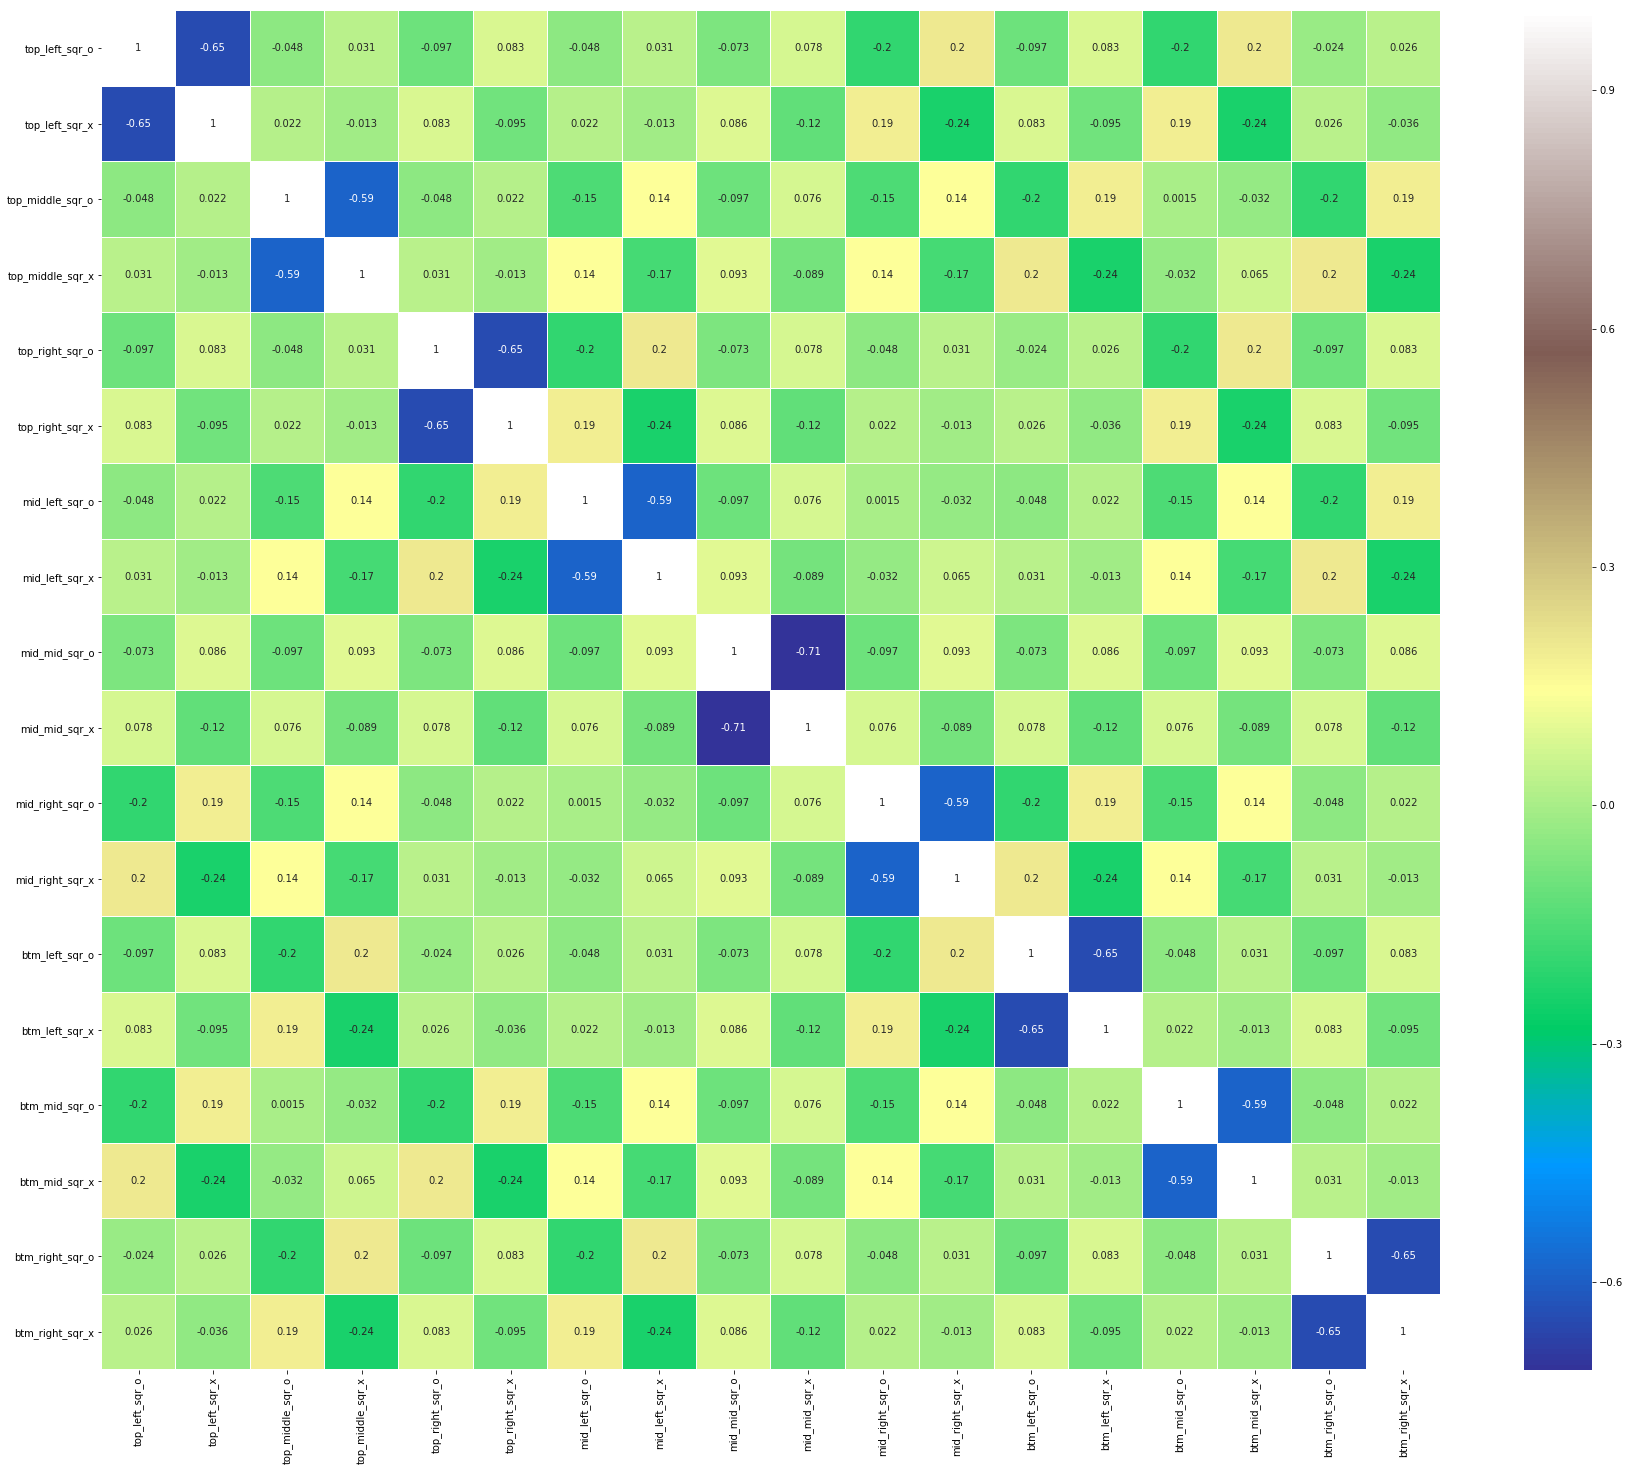

In [48]:
# we will now plot the heatmap to know about the correaltion
# import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#heatmap to find the correlation.
sns.heatmap(dummy_X.corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(30,25)
plt.show()

#### from the above heat map we can say that there is no much correlation between the attributes.

In [27]:
#convert all positives to 1 and all negatives to 0
df.loc[df['class'] == 'positive', 'class'] = 1
df.loc[df['class'] == 'negative', 'class'] = 0

In [28]:
df['class'].value_counts()

1    626
0    332
Name: class, dtype: int64

In [29]:
df['class'].unique()

array([1, 0], dtype=object)

#### Creating our models.

In [30]:
#import LogisticRegression, DecisionTreeClassifier, train_test_split,accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [31]:
X = dummy_X
y = df['class'].astype('int')

In [32]:
#divide the data into 70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)


## Bechmark model (Naive Bayes)

In [33]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
pred1 = clf.predict(X_train)
print("\nNaive Bayes Train accuracy", round(accuracy_score(y_train, pred1), 5))

pred1= clf.predict(X_test)
print("\nNaive Bayes test accuracy", round(accuracy_score(y_test, pred1), 5))


Naive Bayes Train accuracy 0.69403

Naive Bayes test accuracy 0.71875


#### For benchmark Model we achived an accuracy of 71.875% and we will try to achieve better accuracy for other models than this.

### Logistic Regression

In [34]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
#finding training and testing accuracy
pred = lr.predict(X_train)
print("\nLogistic Regression - Train accuracy ", round(accuracy_score(y_train, pred), 5))

pred = lr.predict(X_test)
print("\nLogistic Regression - Test accuracy", round(accuracy_score(y_test, pred), 5))


Logistic Regression - Train accuracy  0.98358

Logistic Regression - Test accuracy 0.98264


### Decision Tree

In [36]:
#Decision Tree
model_dtc = DecisionTreeClassifier(random_state=1000)
model_dtc.fit(X_train, y_train)
prediction_dtc1 = model_dtc.predict(X_train)
prediction_dtc = model_dtc.predict(X_test)
print('Decison Tree - Train accuracy: ', accuracy_score(prediction_dtc1, y_train))
print('Decison Tree - Test accuracy: ', accuracy_score(prediction_dtc, y_test))

Decison Tree - Train accuracy:  1.0
Decison Tree - Test accuracy:  0.9548611111111112


### RandomForest

In [37]:
#import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1000)

In [38]:
#fit the model
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

In [39]:
#predicting and finding the accuracy
pred2 = rf.predict(X_train)
print("\nRandom forest Train accuracy", round(accuracy_score(y_train, pred2), 5))

pred2= rf.predict(X_test)
print("\n Random forest test accuracy", round(accuracy_score(y_test, pred2), 5))


Random forest Train accuracy 1.0

 Random forest test accuracy 0.98611


### Form the above three models Random Forest is having the moore accuracy than that of the remaining two models that is it has an accuaracy of 98.611 which is also greater than that of the benchmark model.

### Testing for various random states

In [40]:
#import DecisionTreeClassifier for randomstate=1005
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(random_state=1005)
#fit the model
rf1.fit(X_train,y_train)
#predicting and finding the accuracy
pred3 = rf1.predict(X_train)
print("\nRandom forest Train accuracy", round(accuracy_score(y_train, pred3), 5))

pred3= rf1.predict(X_test)
print("\n Random forest test accuracy", round(accuracy_score(y_test, pred3), 5))


Random forest Train accuracy 1.0

 Random forest test accuracy 0.97222


In [41]:
#import DecisionTreeClassifier for random state=1010
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(random_state=1010)
#fit the model
rf2.fit(X_train,y_train)
#predicting and finding the accuracy
pred4 = rf2.predict(X_train)
print("\nRandom forest Train accuracy", round(accuracy_score(y_train, pred4), 5))

pred4= rf2.predict(X_test)
print("\n Random forest test accuracy", round(accuracy_score(y_test, pred4), 5))


Random forest Train accuracy 1.0

 Random forest test accuracy 0.98611


### From the above we can say that by using the random states 1000,1005,1010 ther is not much change in the accuracy. The average is accuracy is 0.98148 which is very near to the accuracy using random state=1000.From this we can say that Small changes in the training data will not affect the results greatly. So the results found from this model can be trusted.

### Refining the model:
 We will now use GridSearchCV inorder to the refine the above obtained model inorder to achieve better accuracy. We will tune n_estimators and criterion.

In [42]:
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=1000)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': [450,500], 
              'criterion': ['gini', 'entropy']}

# TODO: Make an fbeta_score scoring object


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf,parameters,scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores

print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))



Optimized Model
------
Final accuracy score on the testing data: 0.9931


From the optimized model we acieved an aaccuracy of 99.31% which is more than that of the actual model.

## Plot the important features:

In [43]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=500, test_size=0.3, random_state=1000):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    # function for printing the feature ranking
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        forest.fit(X_train, y_train)
        # we will now find the important features using feature_importances_
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(X_train.shape[1]):
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
 8) mid_mid_sqr_o                  0.087289
 9) mid_mid_sqr_x                  0.066769
16) btm_right_sqr_o                0.061155
12) btm_left_sqr_o                 0.060851
 4) top_right_sqr_o                0.060515
 5) top_right_sqr_x                0.059549
 0) top_left_sqr_o                 0.058575
13) btm_left_sqr_x                 0.058206
 1) top_left_sqr_x                 0.056143
17) btm_right_sqr_x                0.054379
15) btm_mid_sqr_x                  0.049804
14) btm_mid_sqr_o                  0.049499
 6) mid_left_sqr_o                 0.049119
 7) mid_left_sqr_x                 0.048523
10) mid_right_sqr_o                0.046619
 3) top_middle_sqr_x               0.046406
11) mid_right_sqr_x                0.044907
 2) top_middle_sqr_o               0.041693


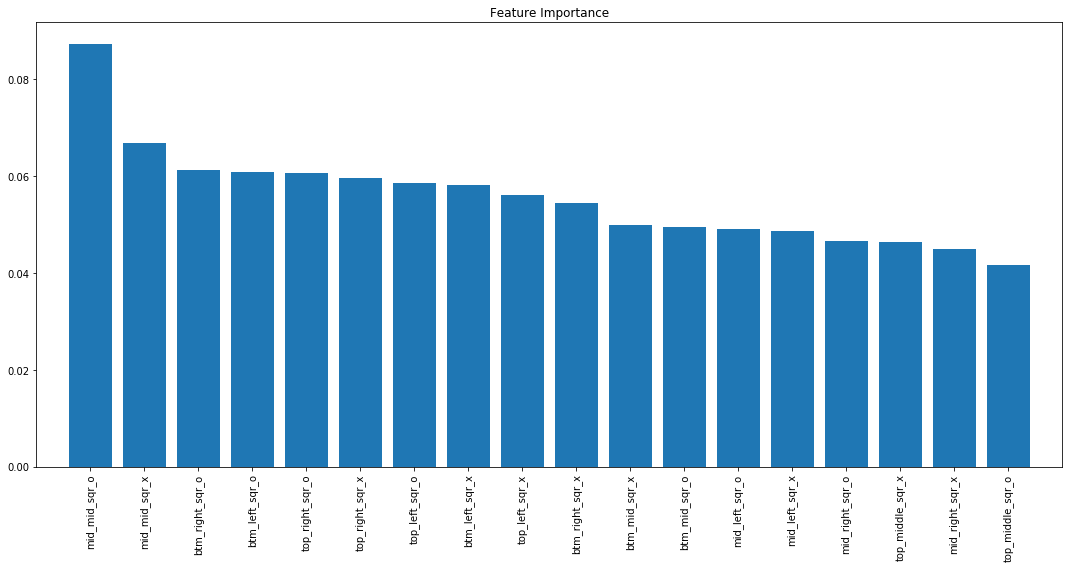

In [44]:
# plotting the graph for Important Features
plt.figure(figsize=(15, 8))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X_train, y_train)

## Conclusion:

### We can clearly say that from the above results for solvong the tic-tac-toe endgame and predicting the correct result the Random Forest is the bestt model which achievs a better accuracy than that of the other models. We are able to find the important features and able to plot them according to their rank.